In [23]:
#importing 
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import datetime
from datetime import timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
import pickle

In [24]:
#function for loading and preprocessing
def wrangle(filepath):
  df=pd.read_csv(filepath)
  return df


In [3]:
df1=wrangle('/content/drive/MyDrive/Credeit Scoring/application_record.csv')
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df2=wrangle('/content/drive/MyDrive/Credeit Scoring/credit_record.csv')
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [25]:
#merging our 2 data
df=df1.merge(df2,how='inner',on=['ID'])
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [6]:
df.set_index('ID',inplace=True)
df.head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
ID,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C


In [7]:
# how many categorical columns we have
df.select_dtypes('object').head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,STATUS
ID,,,,,,,,,
5008804,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN,C
5008804,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN,C


In [8]:
#how many numerical features 
df.select_dtypes('number').head(2)

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
ID,,,,,,,,,,
5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,0
5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,-1


In [9]:
#renaming my columns
df.rename(columns = {'CNT_CHILDREN':'N_CHILDREN','AMT_INCOME_TOTAL':'A_INCOME','NAME_FAMILY_STATUS':'MARITAL STATUS'

}, inplace = True)

#Univariant Analysis
on categorical columns

In [10]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: NAME_EDUCATION_TYPE, dtype: int64

In [11]:
df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: NAME_HOUSING_TYPE, dtype: int64

In [12]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [13]:
df['MARITAL STATUS'].value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: MARITAL STATUS, dtype: int64

In [14]:
df['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

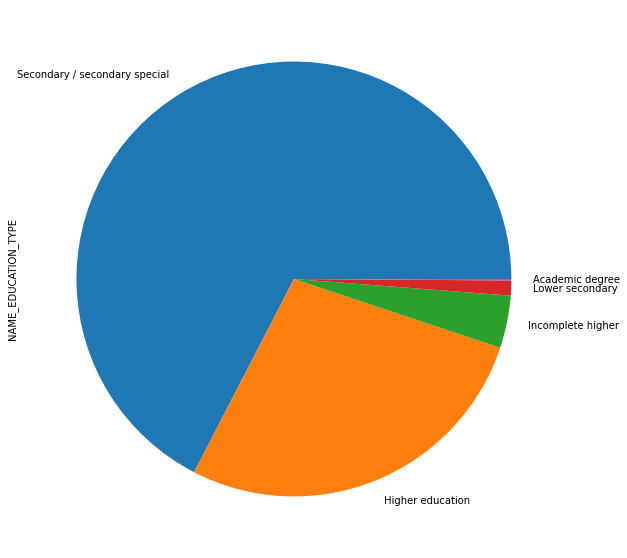

In [22]:
df['NAME_EDUCATION_TYPE'].value_counts().plot(kind='pie',figsize=(10,10));

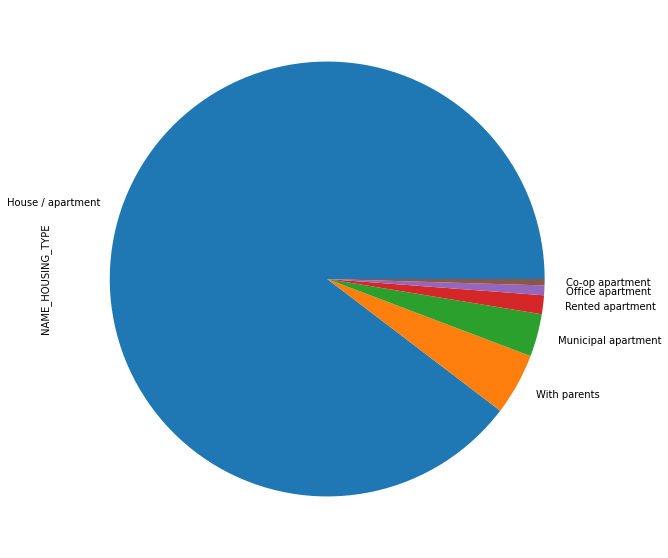

In [20]:
df['NAME_HOUSING_TYPE'].value_counts().plot(kind='pie',figsize=(10,10));

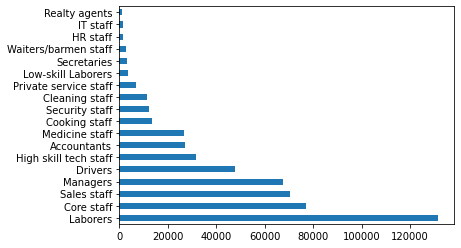

In [17]:
df['OCCUPATION_TYPE'].value_counts().plot(kind='barh');

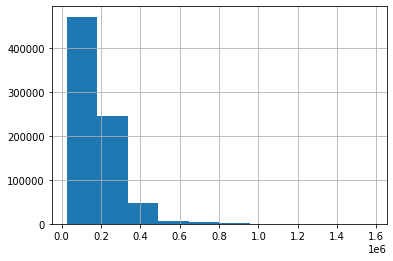

In [18]:
df['A_INCOME'].hist()

In [19]:
df.describe()

,N_CHILDREN,A_INCOME,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 5008804 to 5150337
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  object 
 1   FLAG_OWN_CAR         777715 non-null  object 
 2   FLAG_OWN_REALTY      777715 non-null  object 
 3   N_CHILDREN           777715 non-null  int64  
 4   A_INCOME             777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  object 
 6   NAME_EDUCATION_TYPE  777715 non-null  object 
 7   MARITAL STATUS       777715 non-null  object 
 8   NAME_HOUSING_TYPE    777715 non-null  object 
 9   DAYS_BIRTH           777715 non-null  int64  
 10  DAYS_EMPLOYED        777715 non-null  int64  
 11  FLAG_MOBIL           777715 non-null  int64  
 12  FLAG_WORK_PHONE      777715 non-null  int64  
 13  FLAG_PHONE           777715 non-null  int64  
 14  FLAG_EMAIL           777715 non-null  int64  
 15  OCCUPATION

In [20]:
#removing text
def education(x):
    if x=='Secondary / secondary special':
        x=x.split(' / ')[0]
    return x
df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].apply(education)


In [21]:
#removing text
def fun(x):
    if x=='Single / not married':
        x=x.split(' / ')[0]
    return x
df['MARITAL STATUS']=df['MARITAL STATUS'].apply(fun)


In [22]:
## This function takes no of days and convert it into their datetime format
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

In [23]:
#let's create a function to calculate age of the employee
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age

In [24]:
df.loc[df['STATUS']=='C','STATUS']=6
df.loc[df['STATUS']=='X','STATUS']=7

In [25]:
df['STATUS']=df['STATUS'].astype(float)

In [26]:
def solve(state):
    target=''
    if state in (2,3,4,5):
        target=1 #Risky
    else :
        target=0 #not Risky
        
    return target

In [27]:
df['DAYS_BIRTH']=df['DAYS_BIRTH'].apply(Date_of_Birth)
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].apply(Date_of_Birth)
df['DAYS_BIRTH']=df['DAYS_BIRTH'].apply(AGE)
df.rename(columns={'DAYS_BIRTH':'Age'},inplace=True)
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].apply(AGE)
df['Target']=df['STATUS'].apply(solve)
df.rename(columns={'DAYS_EMPLOYED':'Days_worked'})

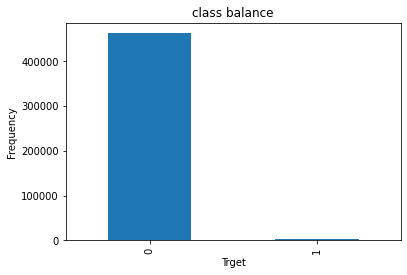

In [66]:
#check for imbalaced data in our target
df['Target'].value_counts().plot(kind='bar',xlabel='Trget',ylabel='Frequency',title='class balance');

In [30]:
#check for any missing value
df.isnull().sum().sort_values(ascending=False)/len(df)

OCCUPATION_TYPE        0.308658
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
STATUS                 0.000000
MONTHS_BALANCE         0.000000
CNT_FAM_MEMBERS        0.000000
FLAG_EMAIL             0.000000
FLAG_PHONE             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_MOBIL             0.000000
DAYS_EMPLOYED          0.000000
Age                    0.000000
NAME_HOUSING_TYPE      0.000000
MARITAL STATUS         0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_INCOME_TYPE       0.000000
A_INCOME               0.000000
N_CHILDREN             0.000000
FLAG_OWN_REALTY        0.000000
Target                 0.000000
dtype: float64

we have only 1 missing data and it's percentage is less than 50% so we should keep it 

In [31]:
#check for duplicated values and droping them
df.duplicated().value_counts().sort_values(ascending=False)
df.drop_duplicates(inplace=True)
df['OCCUPATION_TYPE'].fillna('Other',inplace=True)

In [32]:
#droping nan &columns
df.dropna(inplace=True)
df=df.drop(columns='FLAG_MOBIL')
df=df.drop(columns='STATUS')

#Bivariant Analysis

In [61]:
#correlation
corr=df.corr()

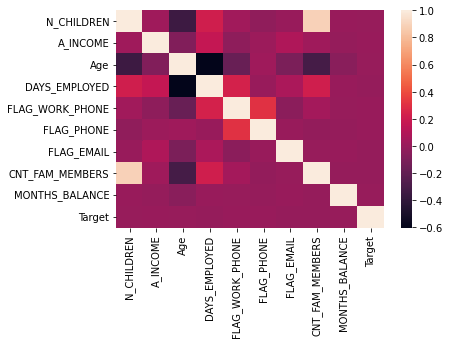

In [34]:
sns.heatmap(corr);

In [35]:
# droping clumns 
df.drop(columns=['N_CHILDREN','FLAG_EMAIL','FLAG_WORK_PHONE'],inplace=True)

In [36]:
#veertical split
target='Target'
X=df.drop(columns=target)
Y=df[target]
print("shape of traing data",X.shape)
print('shape of test data',Y.shape)

shape of traing data (465036, 14)
shape of test data (465036,)


In [59]:
#horizontal split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print('training size',x_train.shape)
print('test size',y_train.shape)

training size (372028, 14)
test size (372028,)


In [60]:
#sampling our data due to class imbalance
over_sampler = RandomOverSampler(random_state=42)
x_train_over, y_train_over = over_sampler.fit_resample(x_train,y_train)
print(x_train_over.shape)
x_train_over.head()

(739994, 14)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,A_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,MARITAL STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,F,N,N,81000.0,Pensioner,Secondary,Married,House / apartment,55,-1000,0,Other,2.0,-7
1,M,N,N,225000.0,State servant,Secondary,Married,House / apartment,41,0,1,Drivers,2.0,-26
2,F,Y,Y,81000.0,Working,Higher education,Married,House / apartment,29,3,1,Core staff,3.0,-38
3,F,N,N,450000.0,Pensioner,Secondary,Married,Municipal apartment,58,-1000,0,Other,2.0,-12
4,F,N,Y,67500.0,Working,Secondary,Single,House / apartment,58,26,0,Other,1.0,-16


In [56]:
#baseline model
acc_baseline = y_train_over.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5


In [40]:
# make pipline
clf=make_pipeline(
      OneHotEncoder(categories='auto',handle_unknown='ignore'),
    StandardScaler(with_mean=False),
    LogisticRegression()

)
clf.fit(x_train_over,y_train_over)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])

In [45]:
#using my test_set for prediction
y_test_pred =pd.Series(clf.predict(x_test))
y_test_pred.head()

0    0
1    0
2    1
3    0
4    0
dtype: int64

In [48]:
#extracting features from our model
features = clf.named_steps["onehotencoder"].get_feature_names()
importances =clf.named_steps["logisticregression"].coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
#calculating odds ratio
odds_ratios = pd.Series(np.exp(importances),index=features).sort_values()
odds_ratios.head()

x9_-1000       0.305187
x9_21          0.561059
x4_Working     0.596999
x3_54000.0     0.616791
x3_252000.0    0.663094
dtype: float64

Text(0.5, 0, 'odds ratio')

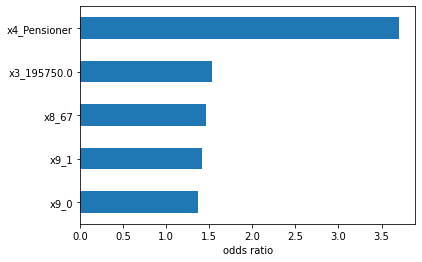

In [50]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind='barh')
plt.xlabel('odds ratio')

Text(0.5, 0, 'odds ratio')

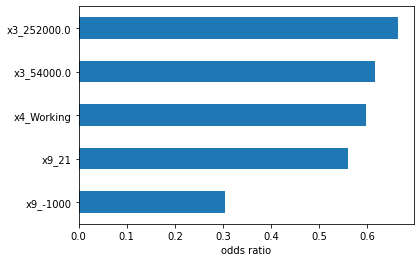

In [51]:
# Horizontal bar chart, five smallest coefficients
odds_ratios.head().plot(kind='barh')
plt.xlabel('odds ratio')

In [52]:
#train & test accuracy
acc_train = clf.score(x_train_over,y_train_over)
acc_test = clf.score(x_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7448
Test Accuracy: 0.7257


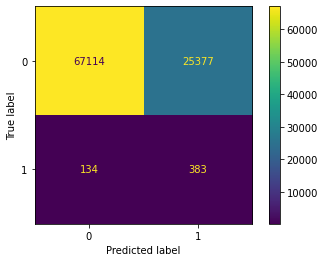

In [53]:
#plot a confusion matrix that shows how your best model performs on your test set.
ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test);

In [58]:
#saving model to a file
with open("model.credit.pkl","wb") as f:
  pickle.dump(clf,f)